![Unidata organization logo](https://github.com/Unidata/metpy-ams-2023/raw/main/logos/unidata_logo_horizontal.png)

# Surface Data

> Surface observations might recall scary memories of METARs, but calm your fears! We can continue to rely on the good work of our community and the powerful tools in this space. We can get straight to dataframes and in-python station model plots without ever having to decode a METAR by hand. (But don't worry, that option is on the table for you still!)

*MetPy for your Data: Analyzing Meteorological Observations in Python*  
*2023 AMS Annual Meeting*

## Table of Contents

* [1: Pandas and point data](#dataread)
* [2: Station Plots for visualizing observations](#stationplot)
* [3: A time series of observations](#timeseries)

<a name="dataread"></a>
## 1. Using Pandas to get point data from Iowa State ASOS Archive

https://mesonet.agron.iastate.edu/request/download.phtml

In [1]:
from datetime import datetime, timedelta
import pandas as pd

# Set a date and time for the observations you want
date = datetime.utcnow()

# Set a time window to look for observations
dt = timedelta(minutes=25)

# Use datetime and time window to set final start/end times
sdate = date - dt
edate = date + dt

Construct data access URL using start and end date/time.

In [2]:
data_url = ('http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?data=all&tz=Etc/UTC&format=comma&latlon=yes&'
            f'year1={sdate.year}&month1={sdate.month}&day1={sdate.day}&hour1={sdate.hour}&minute1={sdate.minute}&'
            f'year2={edate.year}&month2={edate.month}&day2={edate.day}&hour2={edate.hour}&minute2={edate.minute}')

Request Data

In [3]:
# Use Pandas remote csv reading capability to grab desired data
# Make Missing values ('M') into NaNs
# Replace Trace precip with very small float value
df = pd.read_csv(data_url, skiprows=5, na_values=['M'], low_memory=False).replace('T', 0.00001)

In [4]:
# Since we may have gotten more than 1 ob in our time window, only keep the latest observation
data = df.groupby('station').tail(1)

Let's take a look at what data we got!

In [5]:
data

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
1,BAN,2023-01-08 08:10,-119.5200,38.3636,32.0,27.0,81.55,NaN,6.0,0.02,...,SN,NaN,NaN,NaN,NaN,NaN,NaN,25.53,KBAN 080810Z AUTO VRB06KT 1/2SM SN VV009 00/M0...,NaN
19,ETAD,2023-01-08 08:10,6.6992,49.9802,44.6,41.0,87.09,220.0,12.0,0.00,...,-RA,NaN,NaN,NaN,NaN,NaN,NaN,38.04,ETAD 080810Z 22012KT 9999 -RA BKN007 OVC013 07...,NaN
22,LIMG,2023-01-08 08:10,8.1256,44.0458,48.2,48.2,100.00,240.0,3.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.21,LIMG 080810Z 24003KT 170V300 9999 SCT030 SCT05...,NaN
23,VCBI,2023-01-08 08:10,79.8841,7.1808,86.0,71.6,62.25,40.0,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.92,VCBI 080810Z 04010KT 9000 FEW018 BKN040 30/22 ...,NaN
24,EDU,2023-01-08 08:10,-121.7865,38.5315,NaN,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KEDU 080810Z AUTO RMK AO1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,CPF,2023-01-08 08:35,-83.2616,37.3874,35.6,32.0,86.59,0.0,0.0,0.00,...,-RA,NaN,NaN,NaN,NaN,NaN,NaN,35.60,KCPF 080835Z AUTO 00000KT 7SM -RA OVC038 02/00...,NaN
2879,OIC,2023-01-08 08:35,-75.5241,42.5666,25.7,19.4,76.70,340.0,6.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.94,KOIC 080835Z AUTO 34006KT 10SM OVC022 M03/M07 ...,NaN
2880,MMCZ,2023-01-08 08:42,-86.9256,20.5224,71.6,69.8,94.06,70.0,4.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.60,MMCZ 080842Z 07004KT 7SM SCT015 22/21 A3012 RM...,NaN
2881,C62,2023-01-08 08:55,-85.2541,41.4739,29.5,26.6,88.78,0.0,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.50,KC62 080855Z AUTO 00000KT 10SM OVC017 M01/M02 ...,NaN


Thta's a lot of data - What are all of the variables that we have available?

In [6]:
# Use our column names to list the available variables
data.columns.values

array(['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'relh', 'drct',
       'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'gust', 'skyc1', 'skyc2',
       'skyc3', 'skyc4', 'skyl1', 'skyl2', 'skyl3', 'skyl4', 'wxcodes',
       'ice_accretion_1hr', 'ice_accretion_3hr', 'ice_accretion_6hr',
       'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'feel',
       'metar', 'snowdepth'], dtype=object)

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="stationplot"></a>
## 2. Making a station plot
 * Make data request
 * Request data closest to a specific time

In [7]:
# Set a date and time for the observations you want
date = datetime(1993, 3, 13, 12)

# Set a time window to look for observations
dt = timedelta(minutes=15)

# Use datetime and time window to set final start/end times
sdate = date - dt
edate = date + dt

# Use Pandas remote csv reading capability to grab desired data
# Make Missing values ('M') into NaNs
# Replace Trace precip with very small float value
df = pd.read_csv('http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?data=all&'
                 'tz=Etc/UTC&format=comma&latlon=yes&elev=yes&'
                 f'year1={sdate.year}&month1={sdate.month}&day1={sdate.day}&hour1={sdate.hour}&minute1={sdate.minute}&'
                 f'year2={edate.year}&month2={edate.month}&day2={edate.day}&hour2={edate.hour}&minute2={edate.minute}',
                 skiprows=5, na_values=['M'], low_memory=False).replace('T', 0.00001)

# Since we may have gotten more than 1 ob in our time window, only keep the latest observation
data = df.groupby('station').tail(1)

Note that the station information variables (like longitude) have a different shape than the data variables (like temperature).

In [8]:
print(data['tmpf'])
print(data['lon'])

4       41.00
5       62.60
12      51.80
21      55.40
26      57.20
        ...  
2829     9.86
2830      NaN
2831      NaN
2832      NaN
2833      NaN
Name: tmpf, Length: 2614, dtype: float64
4      -103.3112
5       -96.1873
12       -5.8735
21       -2.8500
26       -2.7191
          ...   
2829    -96.7633
2830    -85.4340
2831    -81.1181
2832    -81.4392
2833    -81.2436
Name: lon, Length: 2614, dtype: float64


Subset out global surface data

In [9]:
loc_subset = ((df.lon <= -50) &
              (df.lon >= -180) &
              (df.lat >= 20) &
              (df.lat <= 70))
data = data[loc_subset]

/var/folders/3f/3w3flt9x5rd9y8zbsc7cvvzw0000gp/T/ipykernel_41774/2768208271.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[loc_subset]


Now we need to pull apart the data and perform some modifications, like converting winds to components and convert sky coverage percent to codes (octets) suitable for plotting.

In [10]:
import numpy as np

from metpy.calc import wind_components, altimeter_to_sea_level_pressure
from metpy.plots import wx_code_to_numeric
from metpy.units import units

# Access via Pandas DataFrame and downcast to numpy array to attach units
lats = data.lat.values
lons = data.lon.values
tmpf = data.tmpf.values * units.degF
dwpf = data.dwpf.values * units.degF
alti = data.alti.values * units.inHg
elev = data.elevation.values * units.meter
stid = data.station.values

Generate MSLP values from the Altimeter reading. Utilize the MetPy function to compute with eleveation and temperature.

In [11]:
mslp = altimeter_to_sea_level_pressure(alti, elev, tmpf).to('hPa')

Calculate wind components from wind speed (sknt) and wind direction (drct) values.

In [12]:
# Convert wind to components
u, v = wind_components(data.sknt.values * units.knot, data.drct.values * units.degree)

Convert cloud cover codes to numeric okta values using a small definition.

In [13]:
# Need to handle missing (NaN) and convert to proper code
def assign_cloud_cover(code):
    if 'OVC' in code:
        return 1
    elif 'BKN' in code:
        return 6
    elif 'SCT' in code:
        return 4
    elif 'FEW' in code:
        return 2
    else:
        return 0
    
skyc = data.skyc1.astype('str')
cloud_cover = skyc.apply(assign_cloud_cover)

Assign the numeric weather codes to the METAR current weather text

In [14]:
wxsym = data.wxcodes
wx = wx_code_to_numeric(wxsym.fillna(''))

### Create the map using cartopy and MetPy!

One way to create station plots with MetPy is to create an instance of `StationPlot` and call various plot methods, like `plot_parameter`, to plot arrays of data at locations relative to the center point.

In addition to plotting values, `StationPlot` has support for plotting text strings, symbols, and plotting values using custom formatting.

Plotting symbols involves mapping integer values to various custom font glyphs in our custom weather symbols font. MetPy provides mappings for converting WMO codes to their appropriate symbol. The `sky_cover` function below is one such mapping.

/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/dcamron/mambaforge/envs/metpy-ams-2023/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


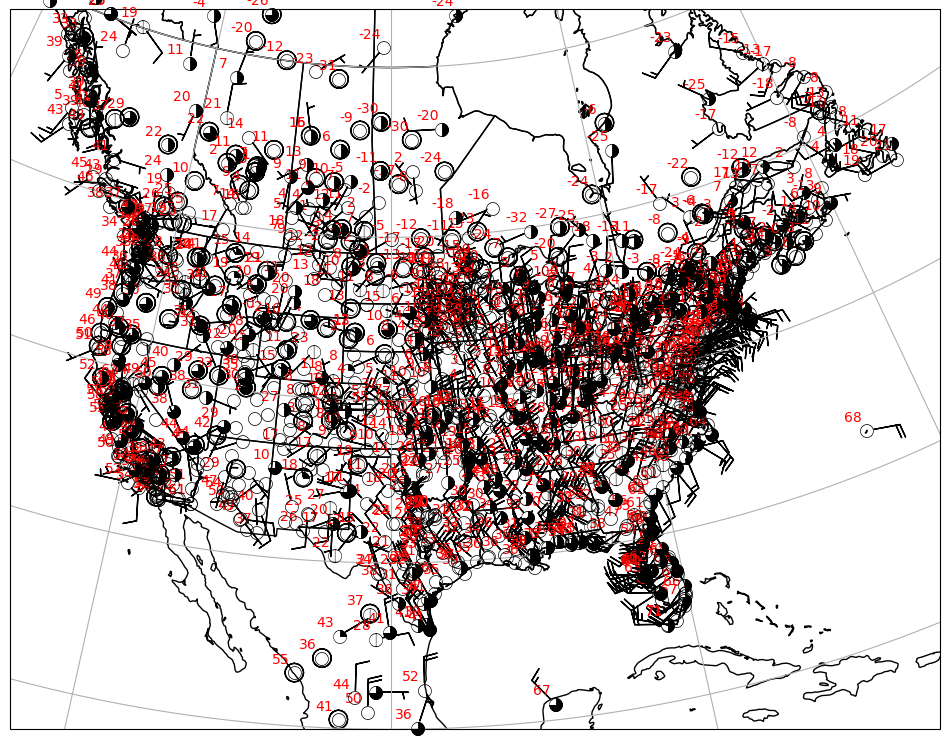

In [15]:
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from metpy.plots import StationPlot
from metpy.plots.wx_symbols import sky_cover, current_weather

# Set up a plot with map features
fig = plt.figure(figsize=(12, 12))
proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([-124, -65, 20, 60], ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black')
ax.gridlines()

# Create a station plot pointing to an Axes to draw on as well as the location of points
stationplot = StationPlot(ax, lons, lats, transform=ccrs.PlateCarree(),
                          fontsize=10)
stationplot.plot_parameter('NW', tmpf, color='red')

# Add wind barbs
stationplot.plot_barb(u, v)

# Plot the sky cover symbols in the center. We give it the integer code values that
# should be plotted, as well as a mapping class that can convert the integer values
# to the appropriate font glyph.
stationplot.plot_symbol('C', cloud_cover, sky_cover)

plt.show()

Notice how there are so many overlapping stations? There's a utility in MetPy to help with that: `reduce_point_density`. This returns a mask we can apply to data to filter the points.

In [16]:
from metpy.calc import reduce_point_density

# Project points so that we're filtering based on the way the stations are laid out on the map
proj = ccrs.Stereographic(central_longitude=-95, central_latitude=35)
xy = proj.transform_points(ccrs.PlateCarree(), lons, lats)

# Reduce point density so that there's only one point within a 200km circle
mask = reduce_point_density(xy, 200000)

Now we just plot with `arr[mask]` for every `arr` of data we use in plotting.

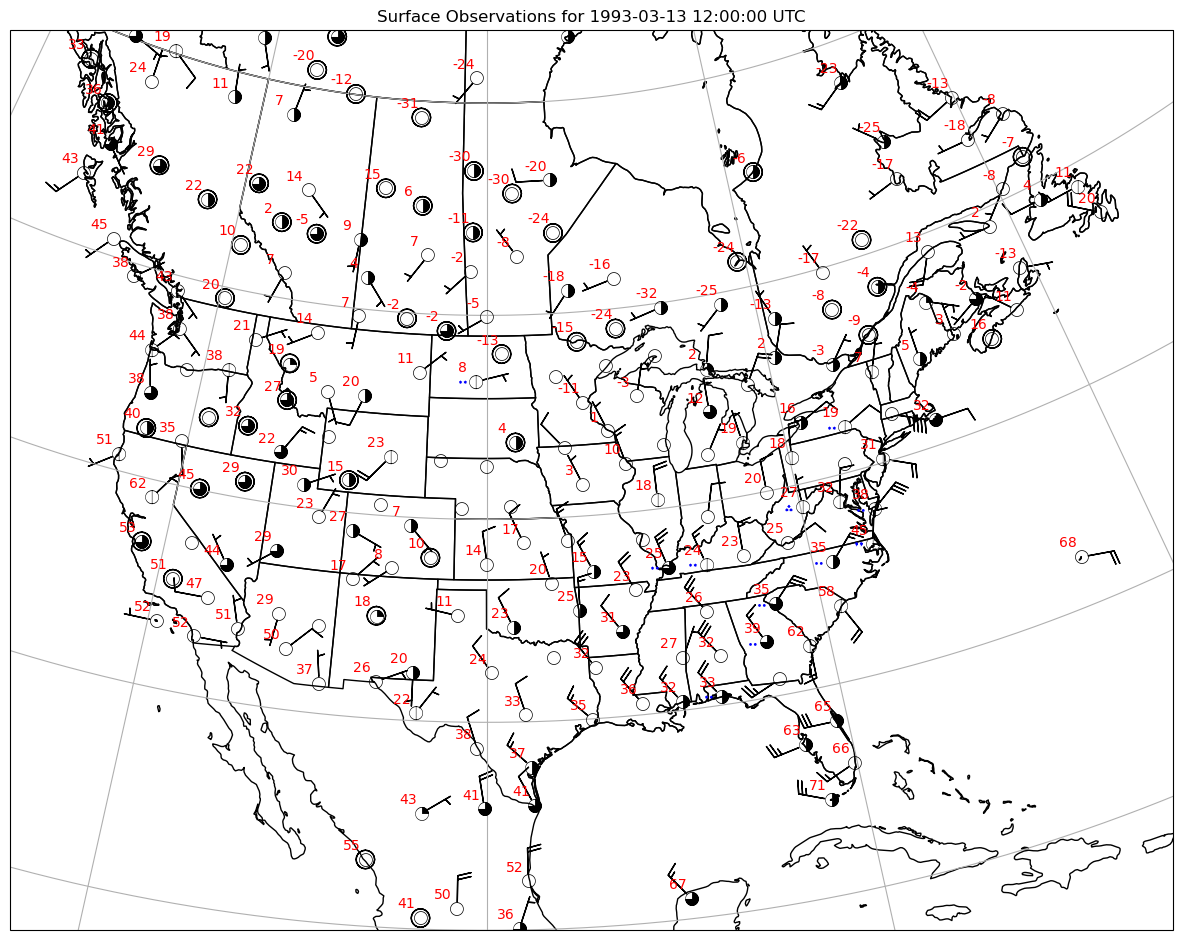

In [17]:
# Set up a plot with map features
fig = plt.figure(figsize=(15, 15))
proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([-124, -65, 20, 60], ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black')
ax.gridlines()

# Create a station plot pointing to an Axes to draw on as well as the location of points
stationplot = StationPlot(ax, lons[mask], lats[mask], transform=ccrs.PlateCarree(),
                          fontsize=10, clip_on=True)
stationplot.plot_parameter('NW', tmpf[mask], color='red')

stationplot.plot_barb(u[mask], v[mask])

stationplot.plot_symbol('C', cloud_cover[mask], sky_cover)
stationplot.plot_symbol('W', wx[mask], current_weather, color='blue')

ax.set_title(f'Surface Observations for {date} UTC')
plt.show()

More examples for MetPy Station Plots:
- [MetPy Examples](https://unidata.github.io/MetPy/examples/index.html)
- [MetPy Symbol list](https://unidata.github.io/MetPy/api/generated/metpy.plots.StationPlot.html#metpy.plots.StationPlot.plot_symbol)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Modify our station plots!</p>
    To plot this image, we will use <b>matplotlib</b> to display our data. Let's first make sure we have the information we need: <br> 
<ul>
    <li>Modify the station plot (reproduced below) to include dewpoint, altimeter setting, as well as the station id. The station id can be added using the `plot_text` method on `StationPlot`.</li>
    <li>Re-mask the data to be a bit more finely spaced, say: 100 km</li>
    <li>Bonus Points: Use the `formatter` argument to `plot_parameter` to only plot the 3 significant digits of altimeter setting. (Tens, ones, tenths)</li>
</ul>
</div>

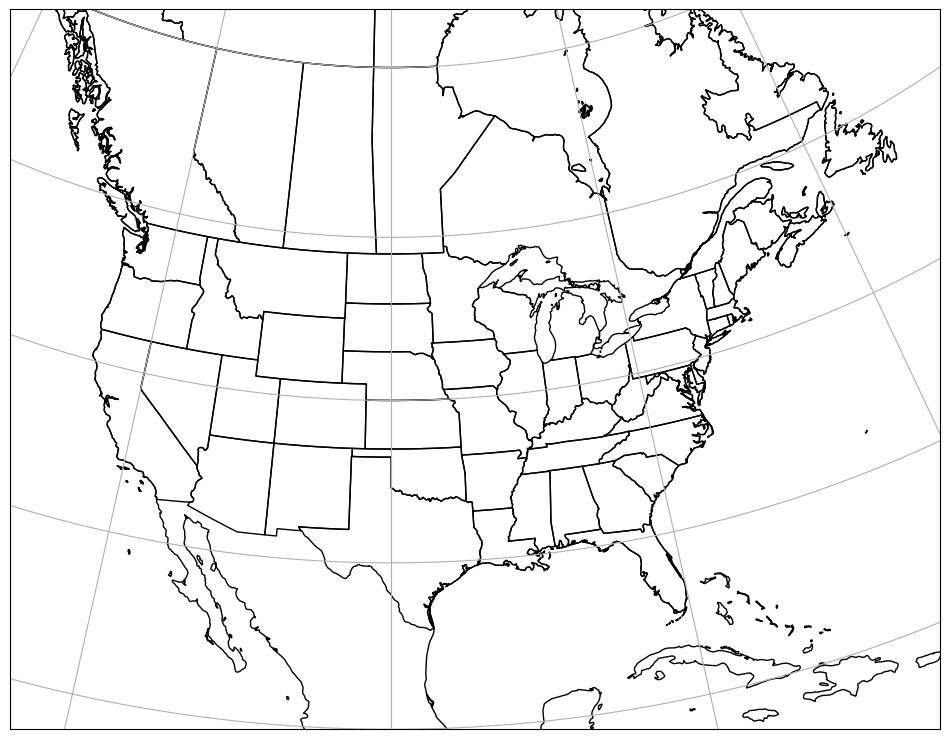

In [18]:
# Use reduce_point_density

# Set up a plot with map features
fig = plt.figure(figsize=(12, 12))
proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([-124, -65, 20, 60], ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black')
ax.gridlines()

# Create a station plot pointing to an Axes to draw on as well as the location of points

# Plot dewpoint

# Plot altimeter setting--formatter can take a function that formats values

# Plot station id

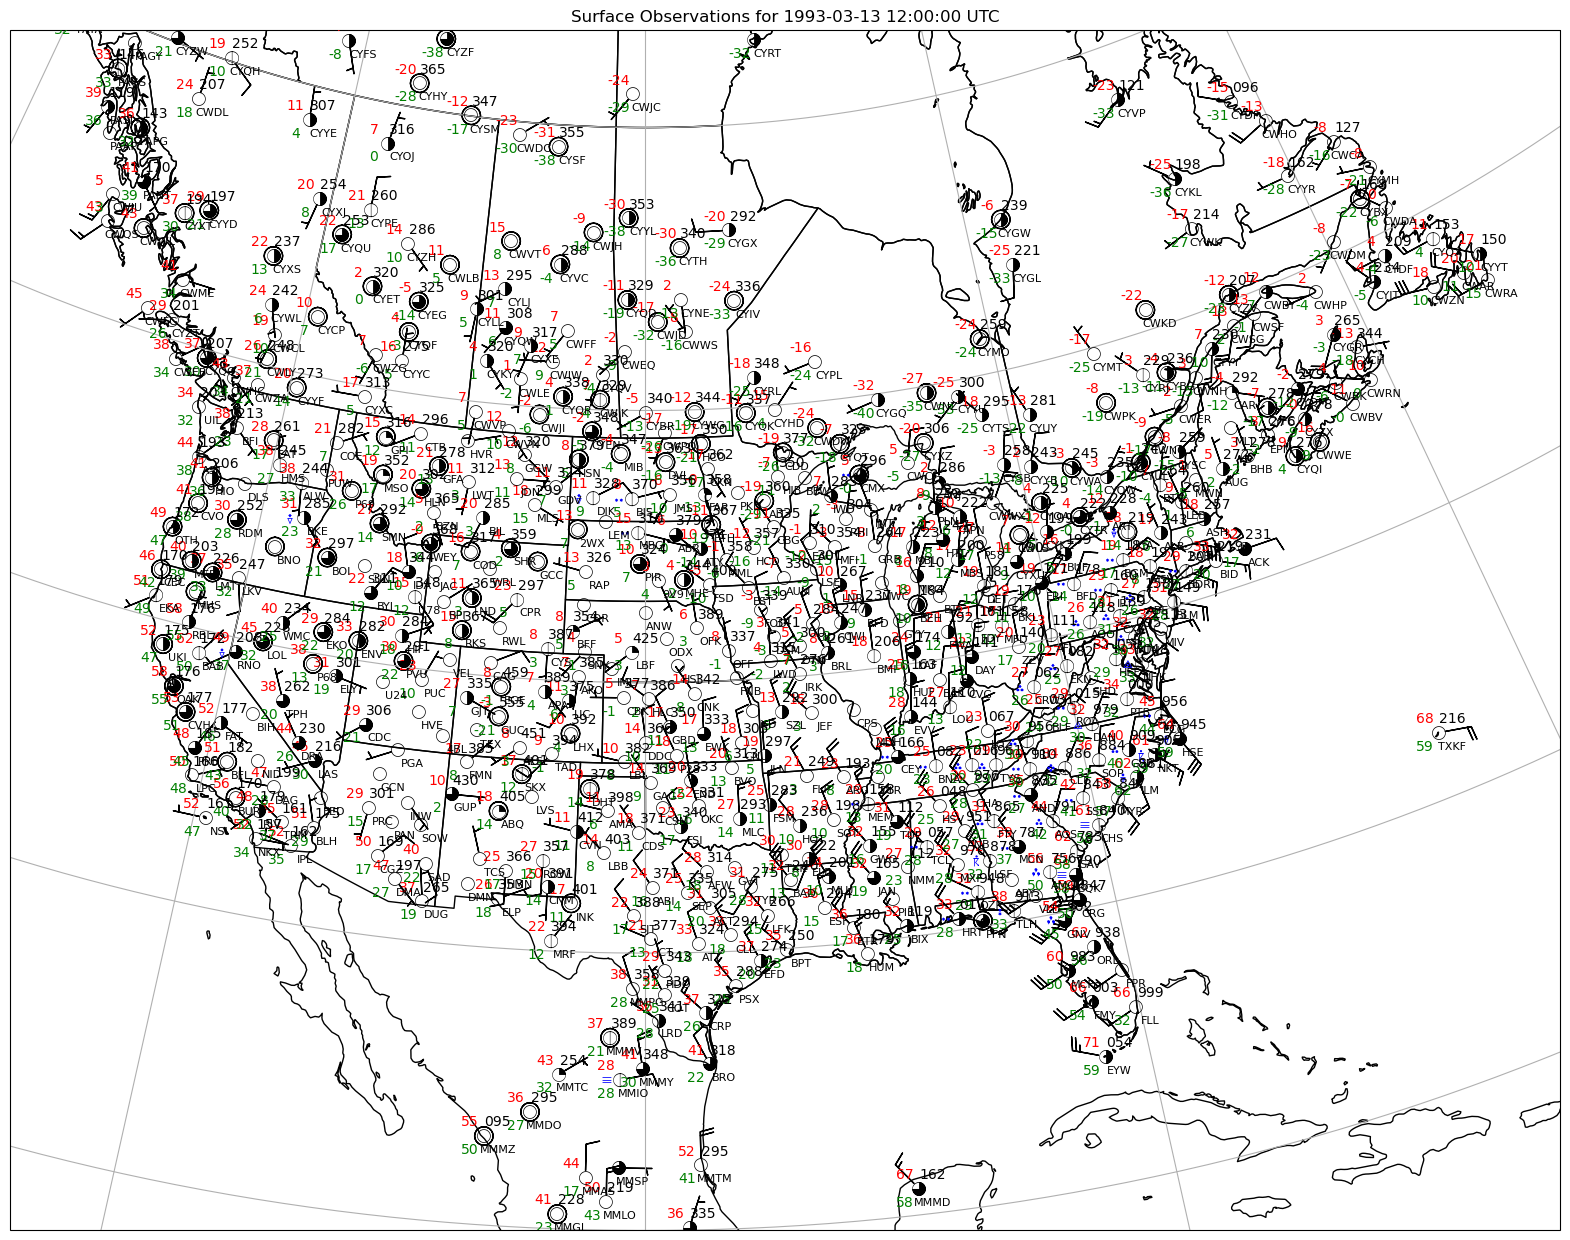

In [19]:
# Solution

# Use reduce_point_density
mask = reduce_point_density(xy, 100000)

# Set up a plot with map features
fig = plt.figure(figsize=(20, 20))
proj = ccrs.LambertConformal(central_longitude=-100, central_latitude=35)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent([-124, -65, 20, 60], ccrs.PlateCarree())

ax.add_feature(cfeature.STATES.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black')
ax.gridlines()

# Create a station plot pointing to an Axes to draw on as well as the location of points
# Create a station plot pointing to an Axes to draw on as well as the location of points
stationplot = StationPlot(ax, lons[mask], lats[mask], transform=ccrs.PlateCarree(),
                          fontsize=10, clip_on=True)
stationplot.plot_parameter('NW', tmpf[mask], color='red')

stationplot.plot_barb(u[mask], v[mask])

stationplot.plot_symbol('C', cloud_cover[mask], sky_cover)
stationplot.plot_symbol('W', wx[mask], current_weather, color='blue')

ax.set_title(f'Surface Observations for {date} UTC')

# Plot dewpoint
stationplot.plot_parameter('SW', dwpf[mask], color='green')

# Plot altimeter setting--formatter can take a function that formats values
stationplot.plot_parameter('NE', mslp[mask], color='black', formatter=lambda x: format(10 * x, '.0f')[-3:])

# Plot station id
stationplot.plot_text('SE', stid[mask], fontsize=8)

plt.show()

<a href="#top">Top</a>
<hr style="height:2px;">

<a name="timeseries"></a>
## 3. Time Series request and plot
* Let's say we want the past days worth of data...
* ...for Denver (i.e. DVN)
* ...for the variables mean sea level pressure, air temperature, wind direction, and wind_speed

In [20]:
# Set a date and time for the observations you want
date = datetime.utcnow()

# Set a time window to look for observations
dt = timedelta(hours=24)

# Use datetime and time window for previous 24 hours from chosen time
sdate = date - dt
edate = date

Generate data access URL with only selecting an individual station

In [21]:
# Select Station
station = 'DEN'

# Construct the data access URL
# NOTE: Addition of station variable to only grab that single location
data_url = (f'http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station={station}&'
            'data=all&tz=Etc/UTC&format=comma&latlon=yes&elev=yes&'
            f'year1={sdate.year}&month1={sdate.month}&day1={sdate.day}&hour1={sdate.hour}&minute1={sdate.minute}&'
            f'year2={edate.year}&month2={edate.month}&day2={edate.day}&hour2={edate.hour}&minute2={edate.minute}')

### Let's get the data!

Use Pandas remote csv reading capability to grab desired data

In [22]:
# Make Missing values ('M') into NaNs
# Replace Trace precip with very small float value
# Use time as our index, parse dates to be datetime objects
df = pd.read_csv(data_url,
                 index_col='valid', parse_dates=['valid'],
                 skiprows=5, na_values=['M'], low_memory=False).replace('T', 0.00001)

Subset the data we got to only a few variables and drop times with missing values

In [23]:
# Let's subset to only the values we want to work with
# 'alti', 'tmpf', 'sknt', 'drct'
data = df[['alti', 'tmpf', 'sknt', 'drct']].dropna()
print(data)

                      alti  tmpf  sknt   drct
valid                                        
2023-01-07 08:53:00  30.16  28.0  11.0  170.0
2023-01-07 09:53:00  30.17  21.9  11.0  160.0
2023-01-07 10:53:00  30.17  23.0  11.0  170.0
2023-01-07 11:53:00  30.18  21.9   8.0  150.0
2023-01-07 12:53:00  30.20  21.9  12.0  170.0
2023-01-07 13:53:00  30.22  21.0  12.0  170.0
2023-01-07 14:53:00  30.23  23.0  12.0  160.0
2023-01-07 15:53:00  30.25  25.0   5.0  180.0
2023-01-07 16:53:00  30.26  26.1   6.0  120.0
2023-01-07 17:53:00  30.26  32.0   6.0  150.0
2023-01-07 18:53:00  30.23  36.0   8.0  140.0
2023-01-07 19:53:00  30.21  36.0   8.0  130.0
2023-01-07 20:53:00  30.20  37.0  10.0  130.0
2023-01-07 21:53:00  30.20  35.1  10.0  150.0
2023-01-07 22:53:00  30.20  33.1   9.0  150.0
2023-01-07 23:53:00  30.21  30.9  10.0  170.0
2023-01-08 00:53:00  30.22  28.9  14.0  190.0
2023-01-08 01:53:00  30.23  28.9   7.0  220.0
2023-01-08 02:53:00  30.22  28.9   0.0    0.0
2023-01-08 03:53:00  30.22  26.1  

Let's get the time into a datetime object

In [24]:
valid_times = data.index
print(valid_times)

DatetimeIndex(['2023-01-07 08:53:00', '2023-01-07 09:53:00',
               '2023-01-07 10:53:00', '2023-01-07 11:53:00',
               '2023-01-07 12:53:00', '2023-01-07 13:53:00',
               '2023-01-07 14:53:00', '2023-01-07 15:53:00',
               '2023-01-07 16:53:00', '2023-01-07 17:53:00',
               '2023-01-07 18:53:00', '2023-01-07 19:53:00',
               '2023-01-07 20:53:00', '2023-01-07 21:53:00',
               '2023-01-07 22:53:00', '2023-01-07 23:53:00',
               '2023-01-08 00:53:00', '2023-01-08 01:53:00',
               '2023-01-08 02:53:00', '2023-01-08 03:53:00',
               '2023-01-08 04:53:00', '2023-01-08 05:53:00',
               '2023-01-08 06:53:00', '2023-01-08 07:53:00'],
              dtype='datetime64[ns]', name='valid', freq=None)


### Now for the obligatory time series plot...

In [25]:
wind_data = data.sknt

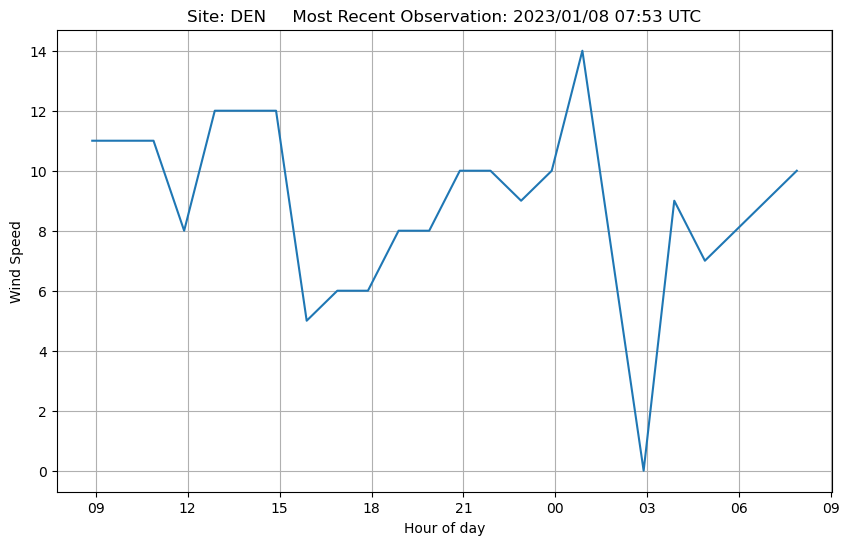

In [26]:
from matplotlib.dates import DateFormatter, AutoDateLocator

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(valid_times, wind_data, color='tab:blue')

ax.set_title(f'Site: {station}     Most Recent Observation: {valid_times[-1].strftime("%Y/%m/%d %H:%M")} UTC')
ax.set_xlabel('Hour of day')
ax.set_ylabel('Wind Speed')
ax.grid(True)

# Improve on the default ticking
locator = AutoDateLocator()
hoursFmt = DateFormatter('%H')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(hoursFmt)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Activity: Exploration</p>
    Tasks:<br> 
<ul>
    <li>Pick a different location</li>
    <li>Plot temperature and dewpoint together on the same plot</li>
</ul>
</div>

<a href="#top">Top</a>
<hr style="height:2px;">

## Additional Take Home Notes

### Decoding METAR

What if you find that you have undecoded METAR data?

MetPy has a METAR parser that we can see how it works using the raw metar data that we get with the remote data we accessed from the Iowa State archive.

In [27]:
from metpy.io import parse_metar_to_dataframe

# Parse single METAR to a Pandas DataFrame
kden = parse_metar_to_dataframe(df.metar.iloc[0])

In [28]:
from io import StringIO

from metpy.io import parse_metar_file

# Join all of the individual metars into a single string
str_obj = '\n'.join(val for val in df.metar)

# Use stringIO to create a file-like object to use with the
# parse_metar_file function from MetPy
obs = parse_metar_file(StringIO(str_obj))

In [29]:
obs

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KDEN,KDEN,39.85,-104.65,1640,2023-01-07 08:35:00,180.0,11.0,NaN,16093.44,NaN,...,-2.0,-5.0,30.15,0,0,0,T10201050 MADISHF,1030.28,-1.347111e-15,11.000000
KDEN,KDEN,39.85,-104.65,1640,2023-01-07 08:40:00,180.0,11.0,NaN,16093.44,NaN,...,-2.0,-5.0,30.15,0,0,0,T10201050 MADISHF,1030.28,-1.347111e-15,11.000000
KDEN,KDEN,39.85,-104.65,1640,2023-01-07 08:45:00,170.0,11.0,NaN,16093.44,NaN,...,-2.0,-6.0,30.15,0,0,0,T10201060 MADISHF,1030.28,-1.910130e+00,10.832885
KDEN,KDEN,39.85,-104.65,1640,2023-01-07 08:50:00,170.0,11.0,NaN,16093.44,NaN,...,-2.0,-6.0,30.15,0,0,0,T10201060 MADISHF,1030.28,-1.910130e+00,10.832885
KDEN,KDEN,39.85,-104.65,1640,2023-01-07 08:53:00,170.0,11.0,NaN,16093.44,NaN,...,-2.0,-6.0,30.16,0,0,0,AO2 SLP224 T10221056 58002,1030.63,-1.910130e+00,10.832885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KDEN,KDEN,39.85,-104.65,1640,2023-01-08 07:50:00,210.0,8.0,NaN,16093.44,NaN,...,-5.0,-9.0,30.18,0,0,0,T10501090 MADISHF,1033.73,4.000000e+00,6.928203
KDEN,KDEN,39.85,-104.65,1640,2023-01-08 07:53:00,210.0,10.0,NaN,16093.44,NaN,...,-4.0,-9.0,30.18,0,0,0,AO2 SLP237 T10441094,1032.93,5.000000e+00,8.660254
KDEN,KDEN,39.85,-104.65,1640,2023-01-08 08:00:00,220.0,10.0,NaN,16093.44,NaN,...,-4.0,-9.0,30.18,0,0,0,T10401090 MADISHF,1032.93,6.427876e+00,7.660444
